# 나만의 EDA 만들기

## 라이브러리

In [1]:
import os
import sys
from glob import glob
import numpy as np
import pandas as pd
import cv2
from PIL import Image
from tqdm.notebook import tqdm
from time import time

import matplotlib.pyplot as plt
import seaborn as sns

## 경로 설정

In [2]:
# train dataset
train_img_dir = '/opt/ml/input/data/train/images'
train_csv_path = '/opt/ml/input/data/train/train.csv'

# eval dataset
eval_img_dir = '/opt/ml/input/data/eval/images'
eval_csv_path = '/opt/ml/input/data/eval/info.csv'

## DataFrame

- 데이터프레임 만들기, 확인
    - df_train, df_eval

In [24]:
# check train dataset info
df_train = pd.read_csv(train_csv_path)
print("<< TrainDataset DataFrame >>")
print(df_train.head())

print('\n ================================================================== \n')

# check eval dataset info
print("<< EvaluationDataset DataFrame >>")
df_test = pd.read_csv(eval_csv_path)
print(df_test.head())

<< TrainDataset DataFrame >>
   id  person_id  gender  age       mask  label                          path
0   1          0  female   45       mask      4        000001_f_45_mask_4.jpg
1   2          0  female   45     normal     16     000002_f_45_normal_16.jpg
2   3          0  female   45       mask      4        000003_f_45_mask_4.jpg
3   4          0  female   45       mask      4        000004_f_45_mask_4.jpg
4   5          0  female   45  incorrect     10  000005_f_45_incorrect_10.jpg


<< EvaluationDataset DataFrame >>
                                        ImageID  ans
0  cbc5c6e168e63498590db46022617123f1fe1268.jpg    0
1  0e72482bf56b3581c081f7da2a6180b8792c7089.jpg    0
2  b549040c49190cedc41327748aeb197c1670f14d.jpg    0
3  4f9cb2a045c6d5b9e50ad3459ea7b791eb6e18bc.jpg    0
4  248428d9a4a5b6229a7081c32851b90cb8d38d0c.jpg    0


## Image 수

In [25]:
def get_img_len(path):
    img_list = []
    for f in glob(path + '/*'):
        img_list.extend(glob(f))
    return len(img_list)

def get_percentage(num_item_list):
    total_ = 0
    for i in num_item_list:
        total_ += i
    ret_list = []
    for i in num_item_list:
        ret_list.append(i / total_ * 100)
    return ret_list

num_train_imgs = get_img_len(train_img_dir)
num_eval_imgs = get_img_len(eval_img_dir)

print('The number of train image: ' + f'{num_train_imgs}')
print('The number of eval image: ' + f'{num_eval_imgs}')
print('percentage of train/eval imgs: ' + f'{get_percentage([num_train_imgs, num_eval_imgs])}')

The number of train image: 18900
The number of eval image: 12600
percentage of train/eval imgs: [60.0, 40.0]


## 요소 중심 분석 - 나이

In [26]:
print(df_train.describe())
# df_train.corr()
# df_train.corr(method='pearson')

                 id     person_id           age         label
count  18803.000000  18803.000000  18803.000000  18803.000000
mean    9402.000000   1342.571451     37.802478      5.022762
std     5428.102891    775.443257     16.975909      4.658673
min        1.000000      0.000000     18.000000      0.000000
25%     4701.500000    671.000000     20.000000      1.000000
50%     9402.000000   1343.000000     38.000000      4.000000
75%    14102.500000   2014.000000     55.000000      7.000000
max    18803.000000   2686.000000     60.000000     17.000000


In [23]:
# tabluar dataset(나이) 출력
print(df_train['age'].value_counts().sort_index()) # int로 출력
# print(df_train['age'].value_counts(bins=age_list, sort=True)) # 범위로 출력

18    1344
19    2786
20    1842
21     280
22     406
23     504
24     434
25     574
26     308
27     105
28     175
29     112
30     119
31      21
32      49
33      35
34      91
35     133
36      56
37      21
38      98
39      42
40     140
41      49
42      91
43     126
44      91
45     189
46      98
47      70
48     273
49     217
50     560
51     441
52     546
53     448
54     574
55     700
56     861
57     742
58    1113
59     595
60    1344
Name: age, dtype: int64


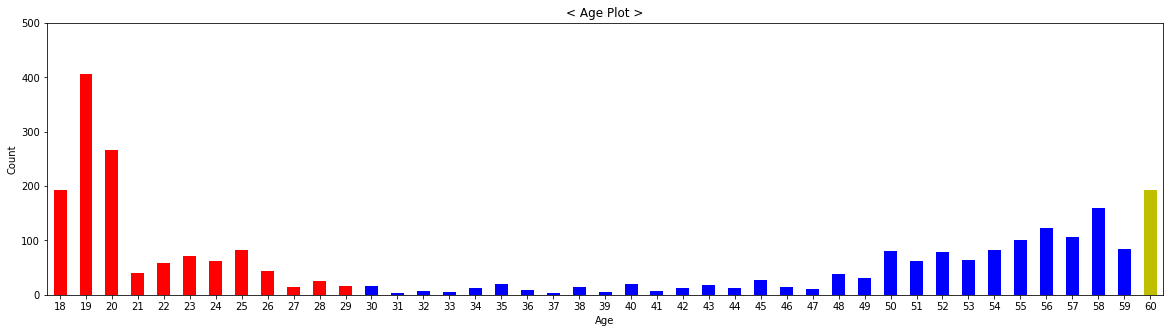

In [65]:
age_list = df_train['age'].unique()
age_list = sorted(age_list)

colors = []
for i in range(18, 61):
    if i < 30:
        colors.append('r')
    elif 30 <= i and i < 60:
        colors.append('b')
    elif 60 <= i:
        colors.append('y')

df = df_train['age'].value_counts().sort_index()
df.plot(kind='bar', rot=0, color=colors)
df = df_train['age'].value_counts().sort_index()
df.plot(kind='bar', rot=0, color=colors)

plt.title("< Age Plot >")
plt.xlabel("Age")
plt.ylabel("Count")
plt.ylim(0, 500)
plt.rcParams['figure.figsize'] = [20, 5]
plt.show()